<a href="https://colab.research.google.com/github/maryam-asadi-coder/-/blob/main/Pathrise_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pathrise
 is an online program that provides personalized mentorship, training, and advice to help job seekers find jobs in the tech industry. New fellows join the program every two weeks, and those who pass the admission process are offered a spot in the program. On average, it takes fellows about four months to secure a job after completing the free trial period, but there is significant variation in the time it takes. Being able to predict how quickly a fellow will be placed at a company is important for Pathrise's operations.

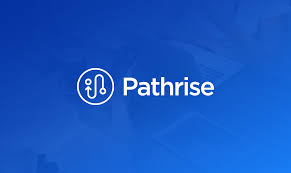
The provided task involves analyzing a sample dataset of fellows from the moment they joined the program to derive insights about:

Whether a fellow will ultimately secure a job placement.
How long it will take until they are placed.
The key objectives are:

Perform exploratory data analysis (EDA) using tools like Pandas and Matplotlib.
Prepare the data and engineer features that will help make predictions.


#Understanding the Objectives
This code appears to be a Python script for analyzing data related to job placement for Pathrise fellows. Here's a breakdown of the code:



#1. Import Libraries:

The code starts by importing necessary libraries for data manipulation, visualization, and machine learning modeling. These include pandas (data handling), numpy (numerical computations), seaborn (data visualization), matplotlib (plotting), and scikit-learn (machine learning algorithms).

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pickle

In [3]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise.xlsx


In [5]:
os.getcwd()

'/content'

In [6]:
df= pd.read_excel('Data_Pathrise.xlsx', engine='openpyxl')

In [7]:
df = df.drop(columns=['id'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   cohort_tag                   2536 non-null   object 
 3   program_duration_days        1928 non-null   float64
 4   placed                       2544 non-null   int64  
 5   employment_status            2315 non-null   object 
 6   highest_level_of_education   2486 non-null   object 
 7   length_of_job_search         2470 non-null   object 
 8   biggest_challenge_in_search  2520 non-null   object 
 9   professional_experience      2322 non-null   object 
 10  work_authorization_status    2260 non-null   object 
 11  number_of_interviews         2326 non-null   float64
 12  number_of_applications       2544 non-null   int64  
 13  gender            

In [9]:
df.shape

(2544, 15)

In [10]:
df.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

# Handling Missing Values

<Axes: >

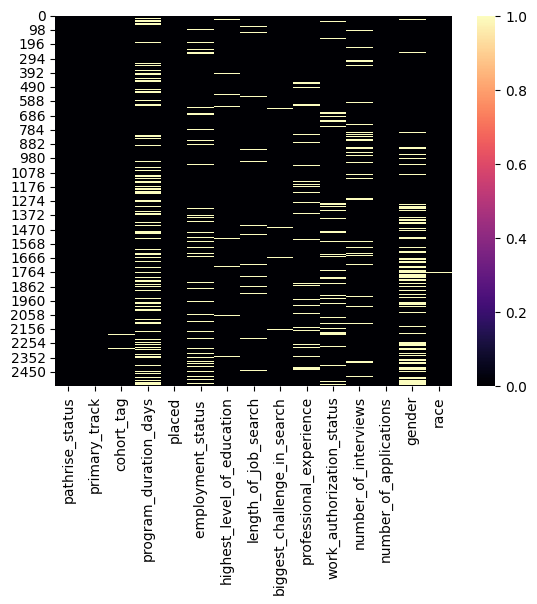

In [11]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = True)

In [12]:
df.isna().sum().sort_values(ascending=False).to_frame().style.set_properties(**{"background-color": "purple","color":"pink","border": "1.5px solid white"})

,0
program_duration_days,616
gender,492
work_authorization_status,284
employment_status,229
professional_experience,222
number_of_interviews,218
length_of_job_search,74
highest_level_of_education,58
biggest_challenge_in_search,24
race,18


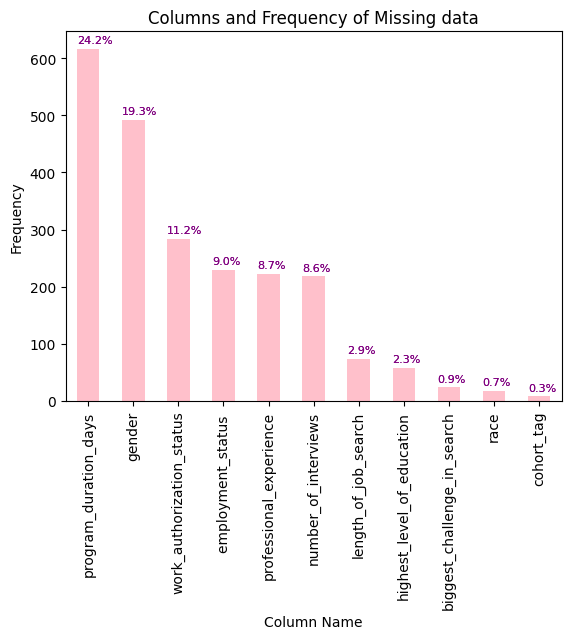

In [13]:
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True, ascending=False)
ax = missing.plot(kind='bar')
ax.set_alpha(0.8)
ax.set_title("Columns and Frequency of Missing data")
ax.set_ylabel("Frequency")
ax.set_xlabel('Column Name')
ax = missing.plot(kind='bar', color='pink')

for i in ax.patches:

     ax.text(i.get_x(), i.get_height() + 10, \
            str(round((i.get_height()/len(df))*100, 1))+'%', fontsize=8,
                color='purple')

In [14]:
df = df.copy()

In [15]:
df = df.dropna(subset=['program_duration_days'])

In [16]:
def fill_with_mode(df, columns_to_fill):
    df = df.copy()
    for col in columns_to_fill:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

In [17]:
columns_to_fill = ['cohort_tag','employment_status ','highest_level_of_education','length_of_job_search','biggest_challenge_in_search', 'professional_experience', 'work_authorization_status','gender', 'race']

In [18]:
df = fill_with_mode(df, columns_to_fill)

In [19]:
# Run a normality test to determine if I should impute using the mean or median
def normal_test(df):

  _,p = stats.normaltest(df, nan_policy = 'omit')

  if p < 0.05:
        return False
  else:
        return True

In [20]:
normal_test(df['number_of_interviews'])

False

In [21]:
median_value = df['number_of_interviews'].median()

In [22]:
df['number_of_interviews'].fillna(median_value, inplace=True)

In [23]:
print(df.isnull().sum())

pathrise_status                0
primary_track                  0
cohort_tag                     0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
dtype: int64


In [24]:
# Access the 'cohort_tag' column to remove extra characters

df['cohort_tag'] = df['cohort_tag'].apply(lambda x: x[:-1] if x.endswith('B') else x)
df['cohort_tag'] = df['cohort_tag'].apply(lambda x: x[:-1] if x.endswith('A') else x)

In [26]:
df.describe(include='object').T.style.set_properties(**{"background-color": "pink","color":"purple","border": "1.5px solid black"})

,count,unique,top,freq
pathrise_status,1928,6,Placed,956
primary_track,1928,6,SWE,1306
cohort_tag,1928,31,JAN19,178
employment_status,1928,5,Student,761
highest_level_of_education,1928,7,Bachelor's Degree,1078
length_of_job_search,1928,5,Less than one month,687
biggest_challenge_in_search,1928,10,Hearing back on my applications,757
professional_experience,1928,4,1-2 years,801
work_authorization_status,1928,9,Citizen,1052
gender,1928,4,Male,1505


# Anomaly Detection

<Axes: xlabel='placed', ylabel='program_duration_days'>

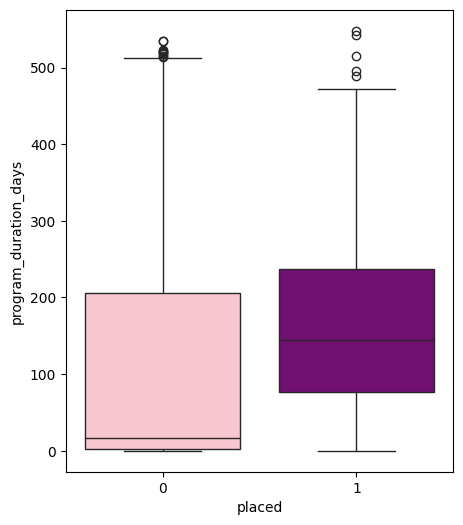

In [34]:
plt.figure(figsize=(5, 6))
colors = ['pink', 'purple', 'gray', 'olive', 'teal']
sns.boxplot(x='placed', y='program_duration_days', data=df, palette=colors)

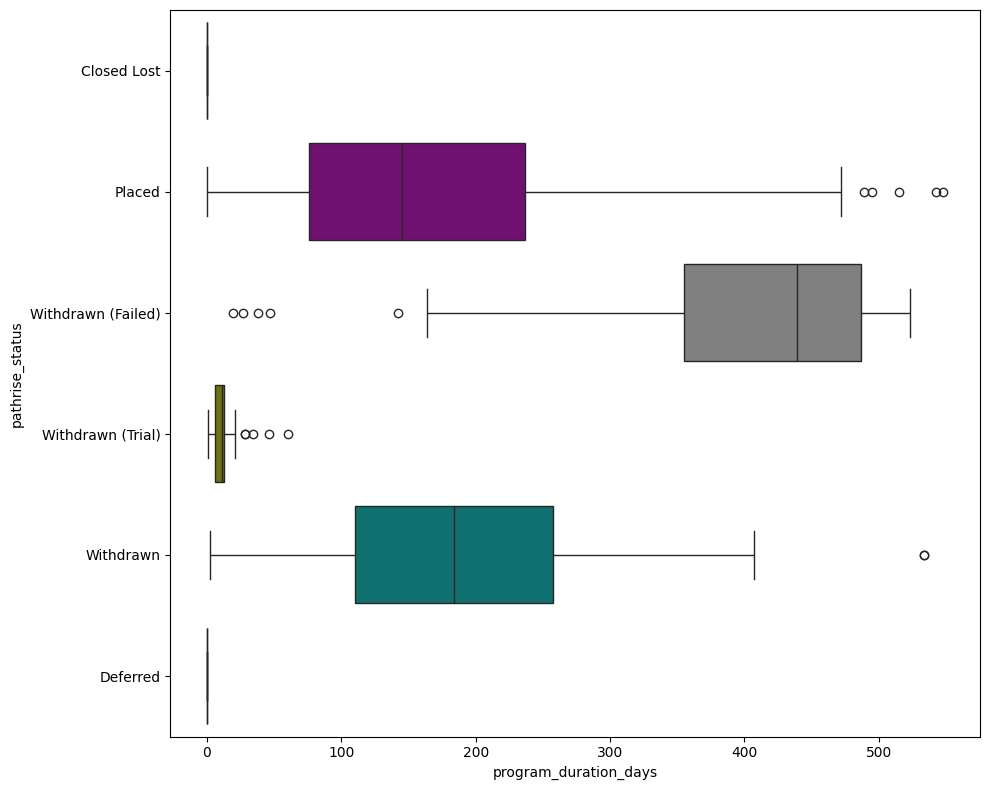

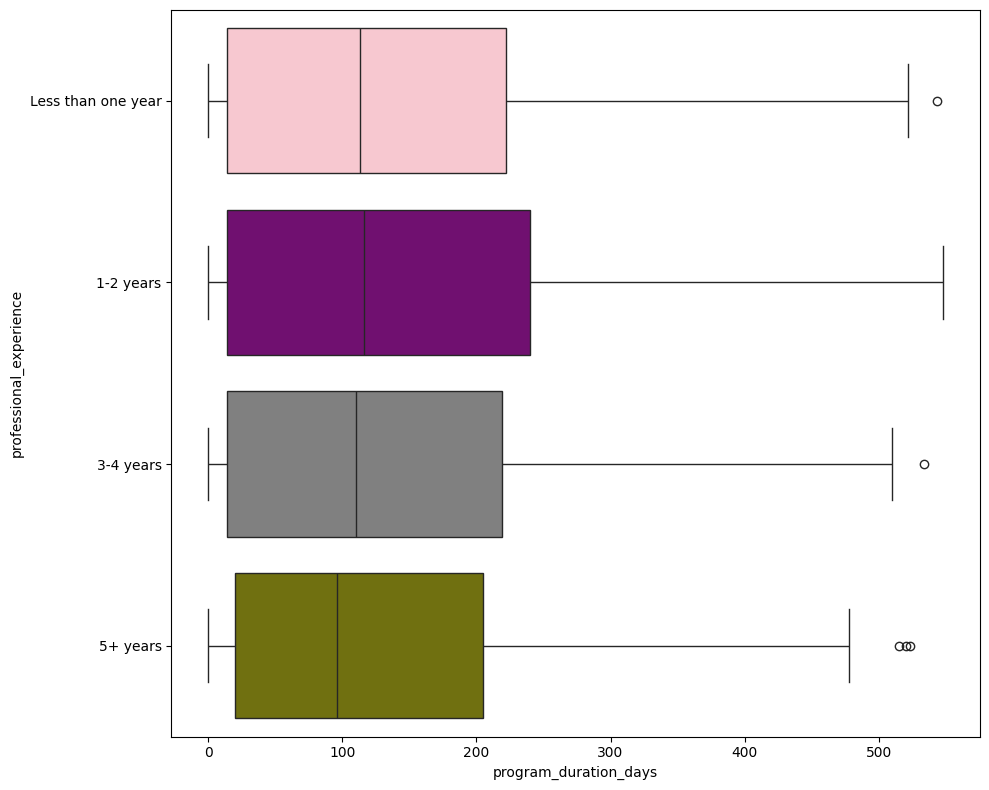

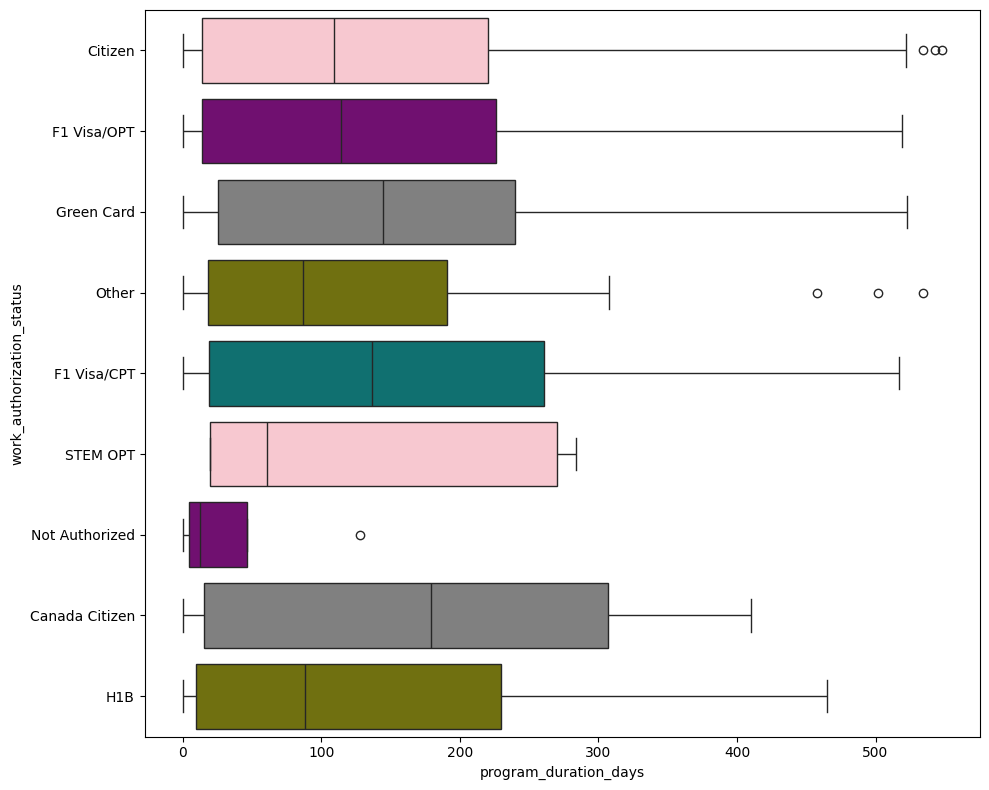

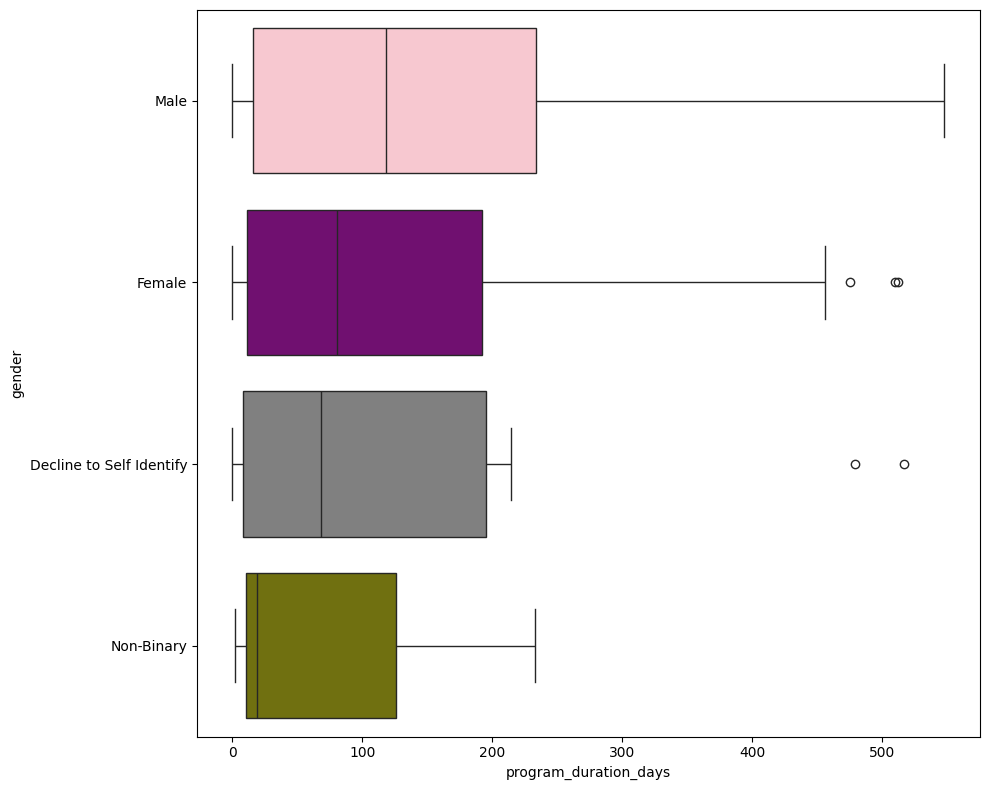

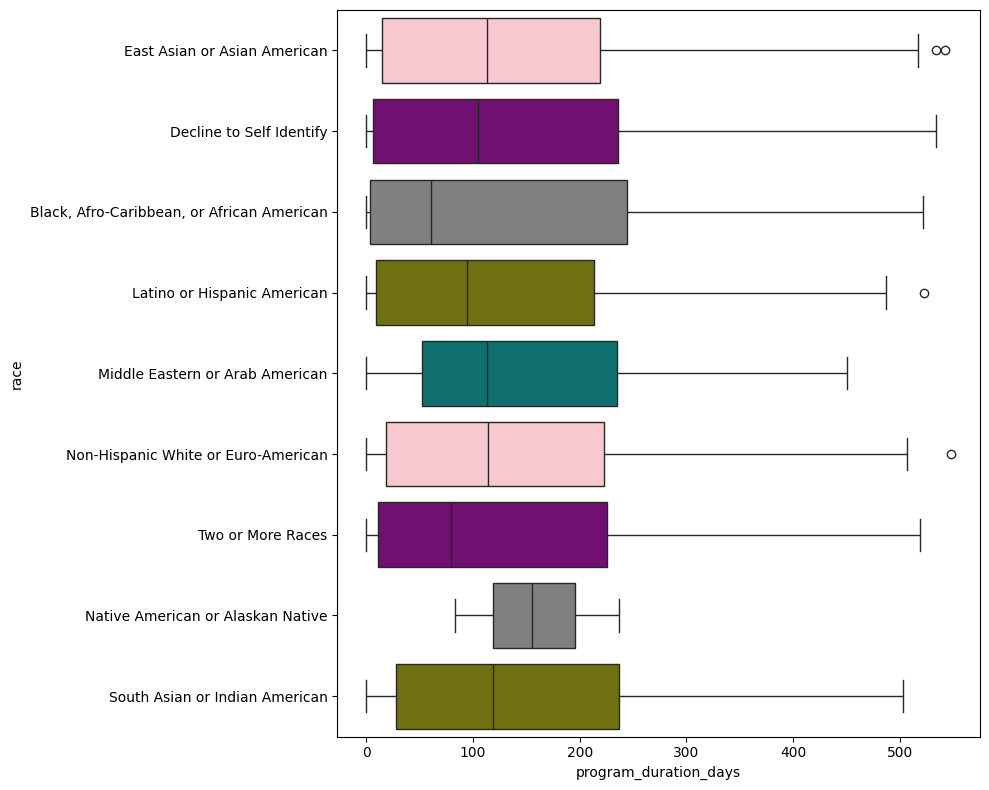

In [35]:
columns_with_boxplot = df[['pathrise_status', 'professional_experience',
       'work_authorization_status','gender', 'race']]

for column in columns_with_boxplot.columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='program_duration_days', y=column, data=df, palette=colors)
    plt.tight_layout()
    plt.show()

# Exploratory Data Analysis (EDA)

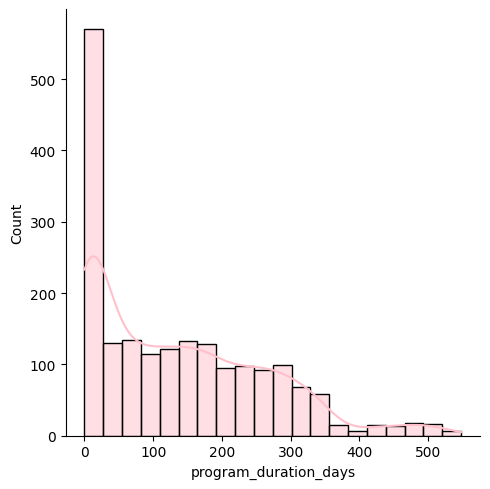

In [40]:
sns.displot(df, x='program_duration_days', kde=True, bins=20, color='pink')

In [41]:
custom_colors = ["pink", "purple", "olive", "gray", "maroon"]

In [42]:
l = list(df['placed'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

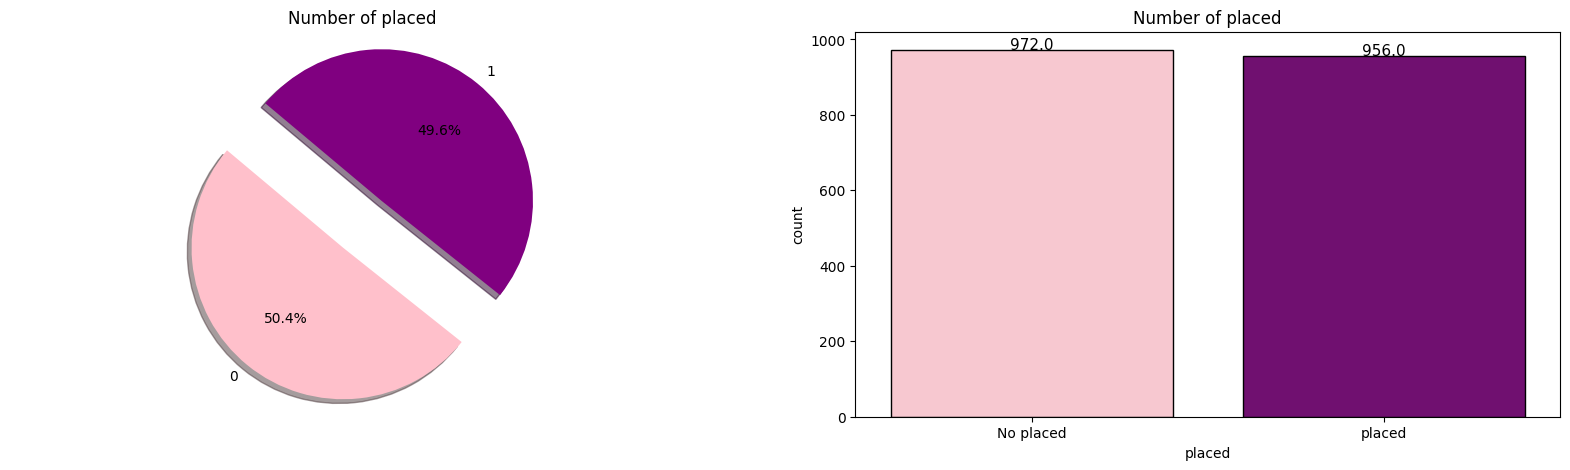

In [44]:
fig, axis = plt.subplots(1,2, figsize=(20,5))
plt.subplot(1,2,1)
category_counts = df['placed'].value_counts()

sizes = (category_counts / category_counts.sum()) * 100

labels = category_counts.index

colors = ['pink', 'purple', 'olive', 'gray', 'maroon']
explode = [0.2] * len(labels)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Number of placed')
plt.axis('equal')

plt.subplot(1,2,2)
ax = sns.countplot(x='placed',data = df, palette = custom_colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No placed','placed'])
plt.title('Number of placed')
plt.show()

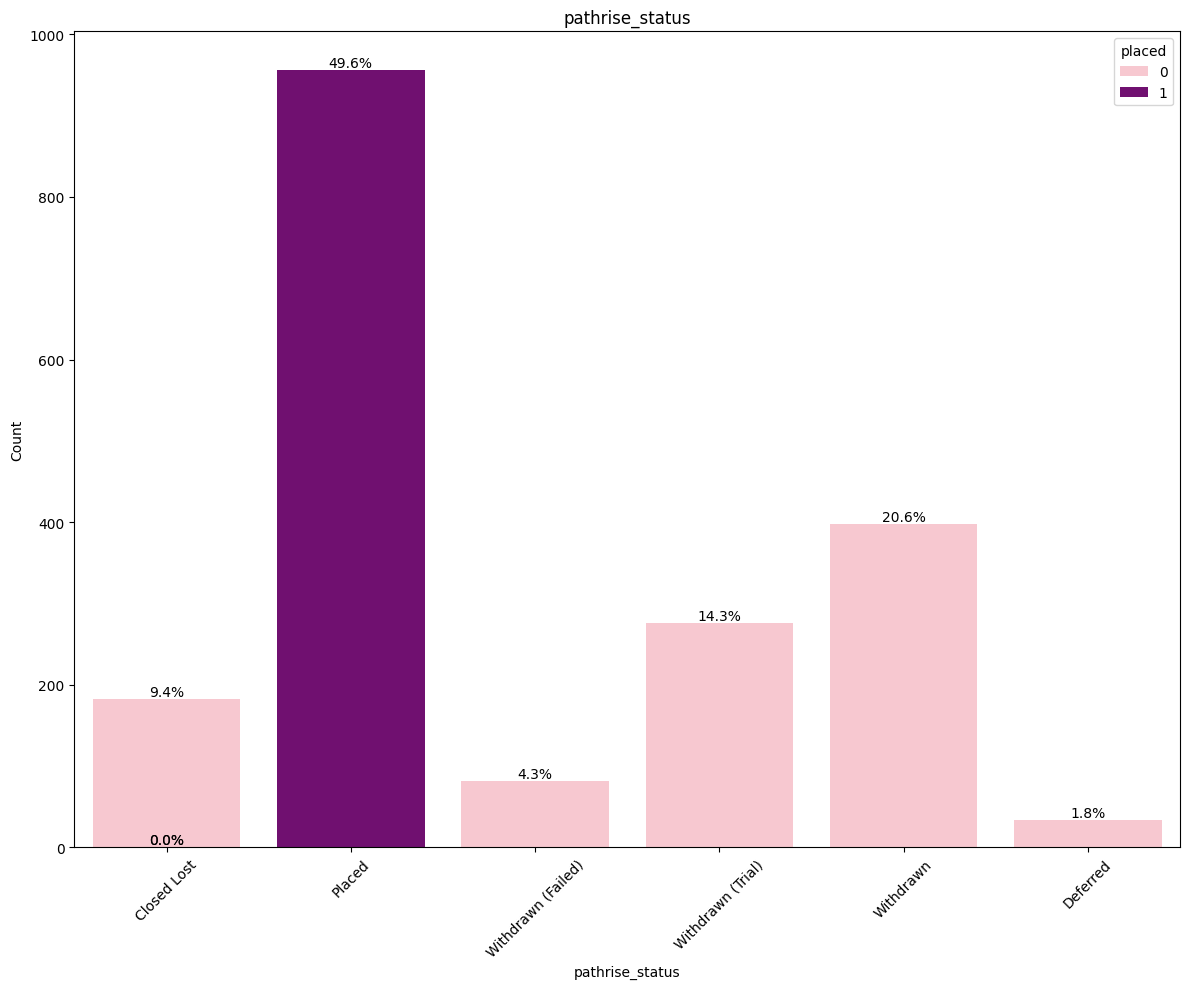

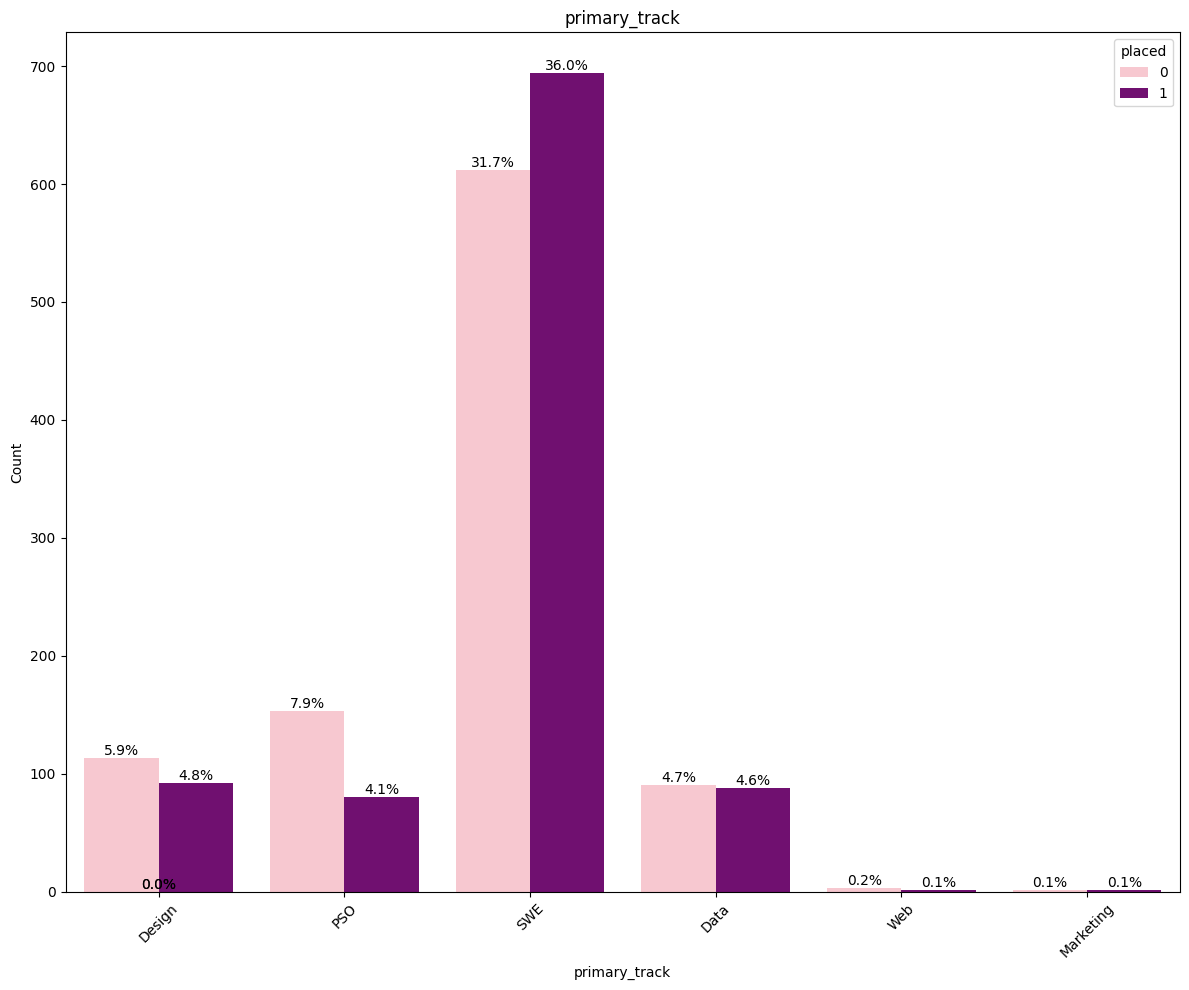

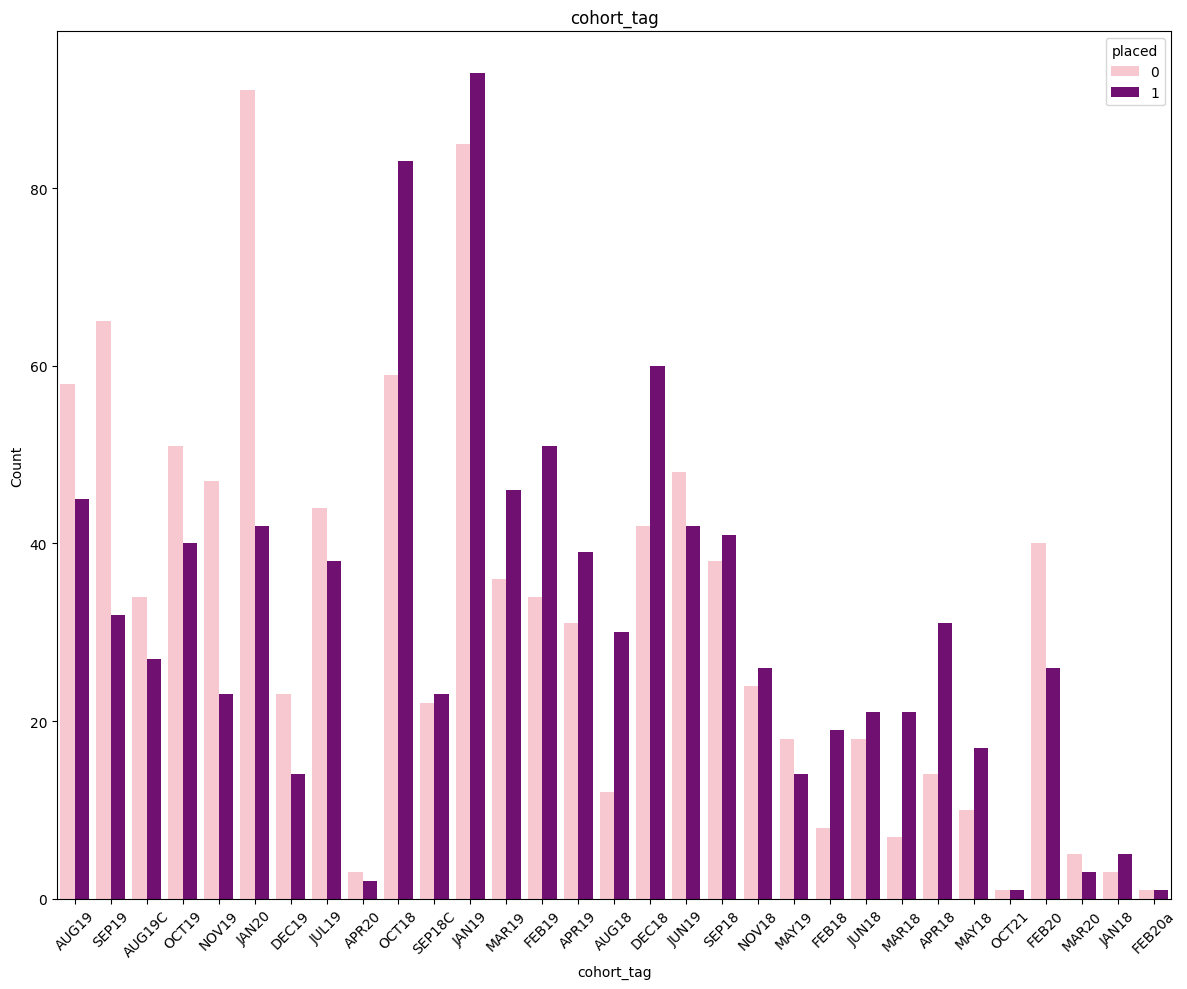

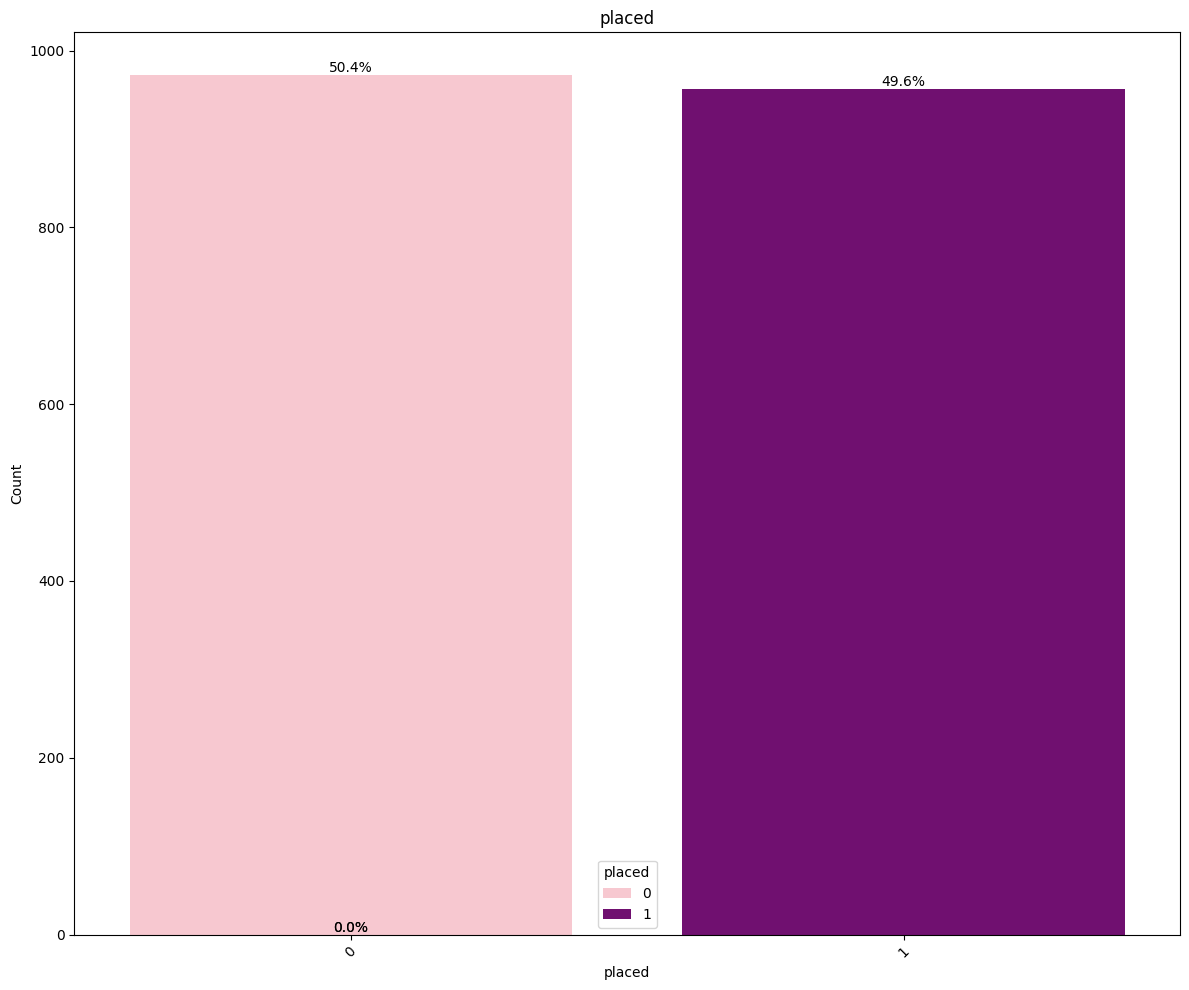

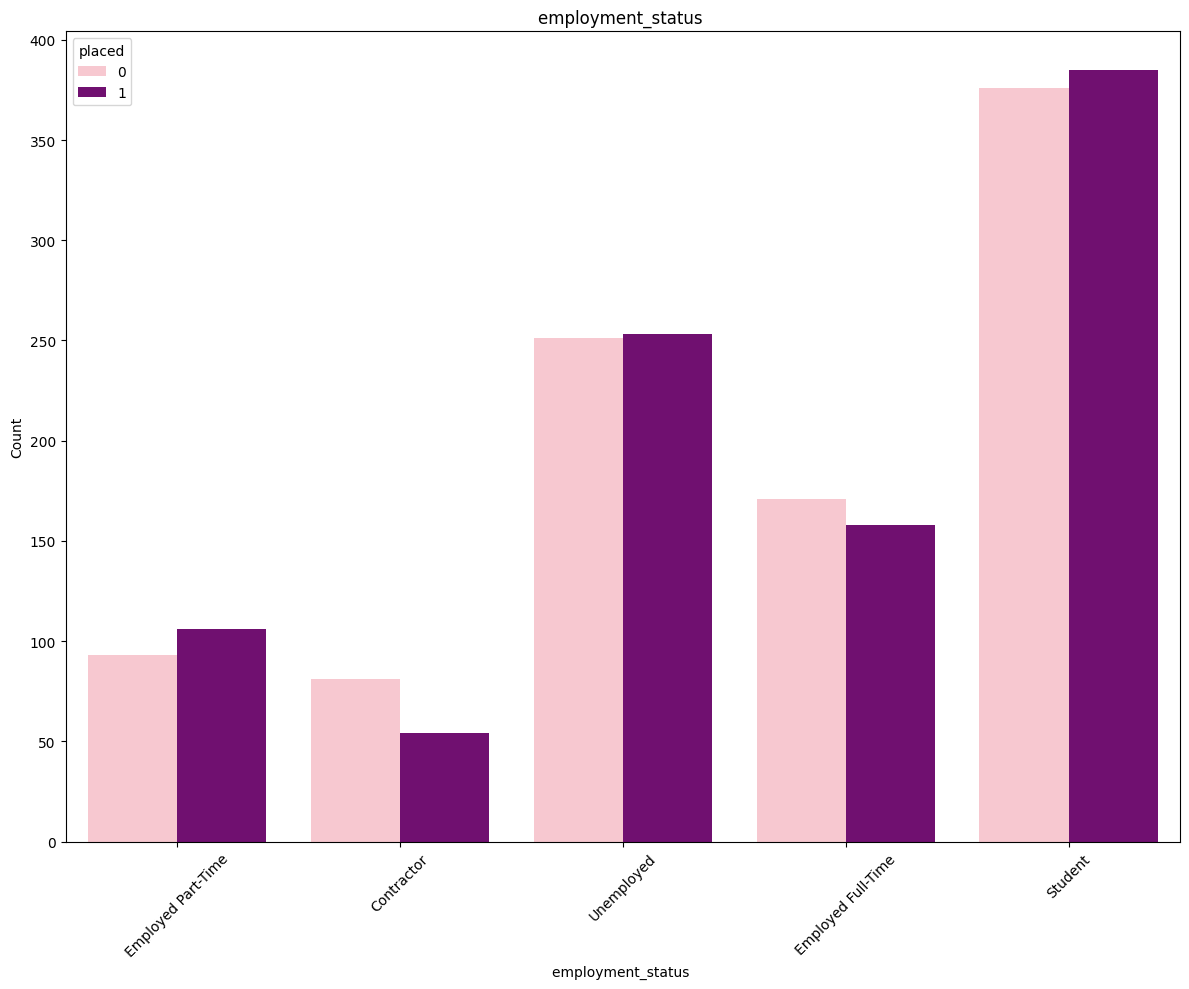

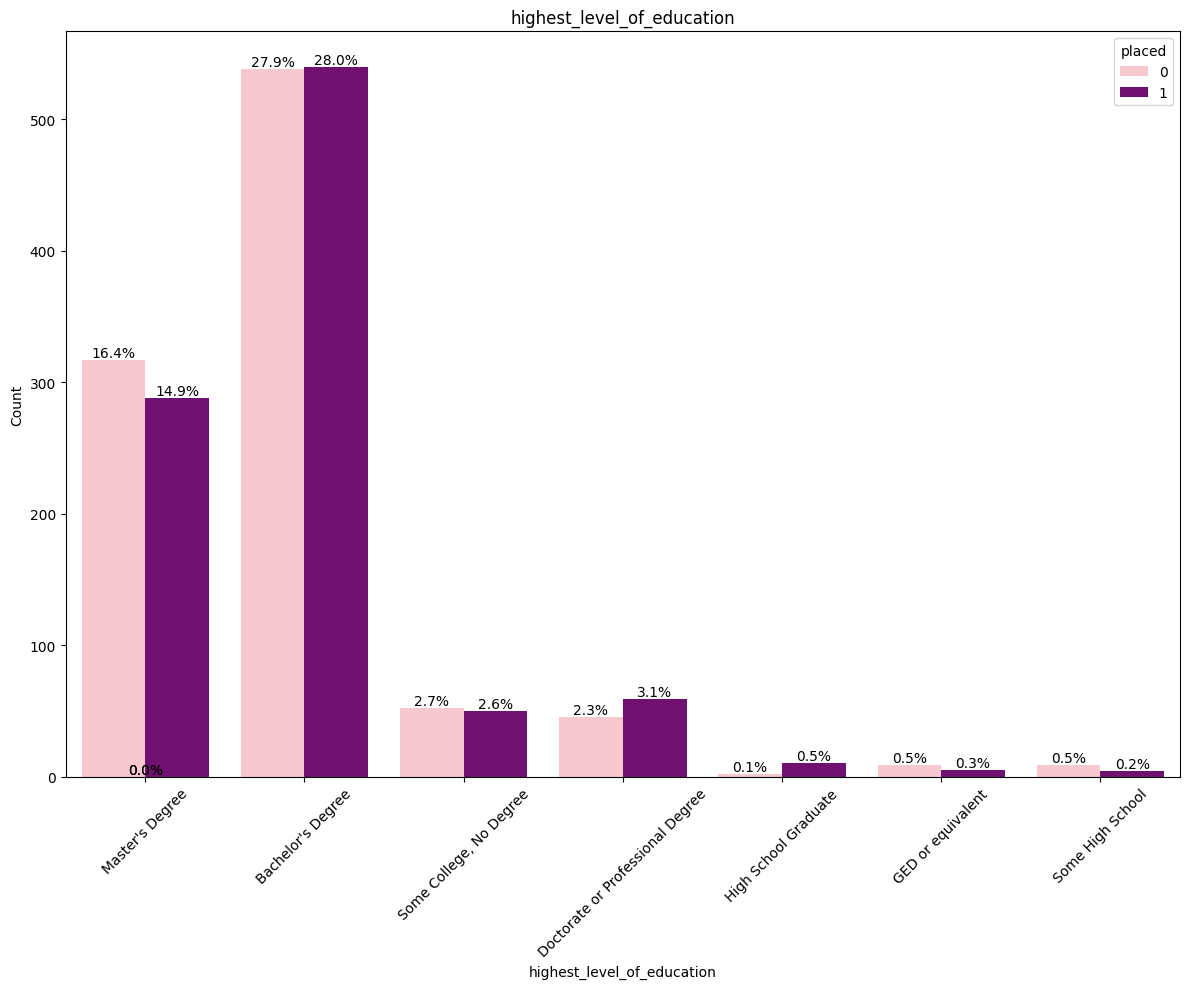

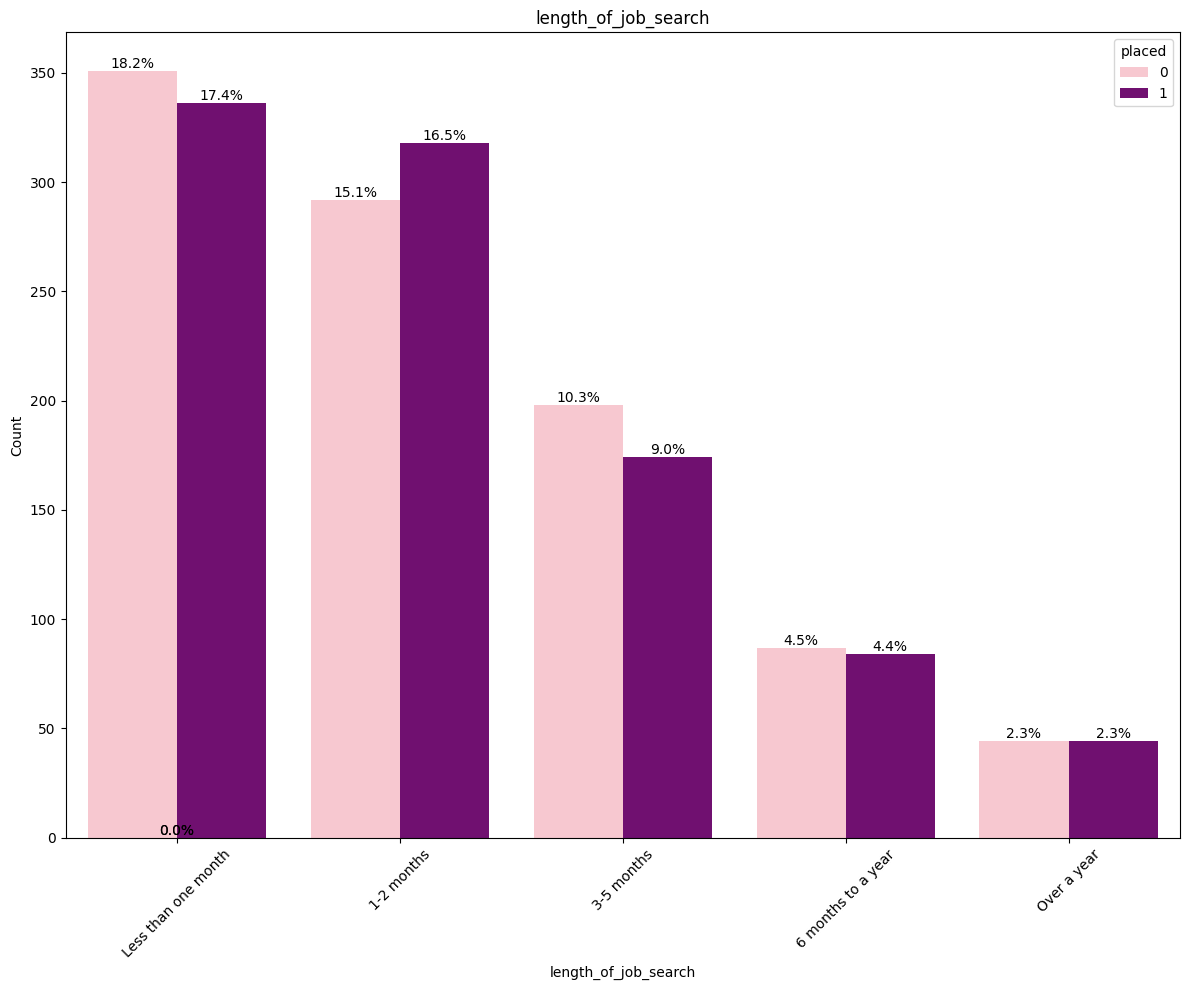

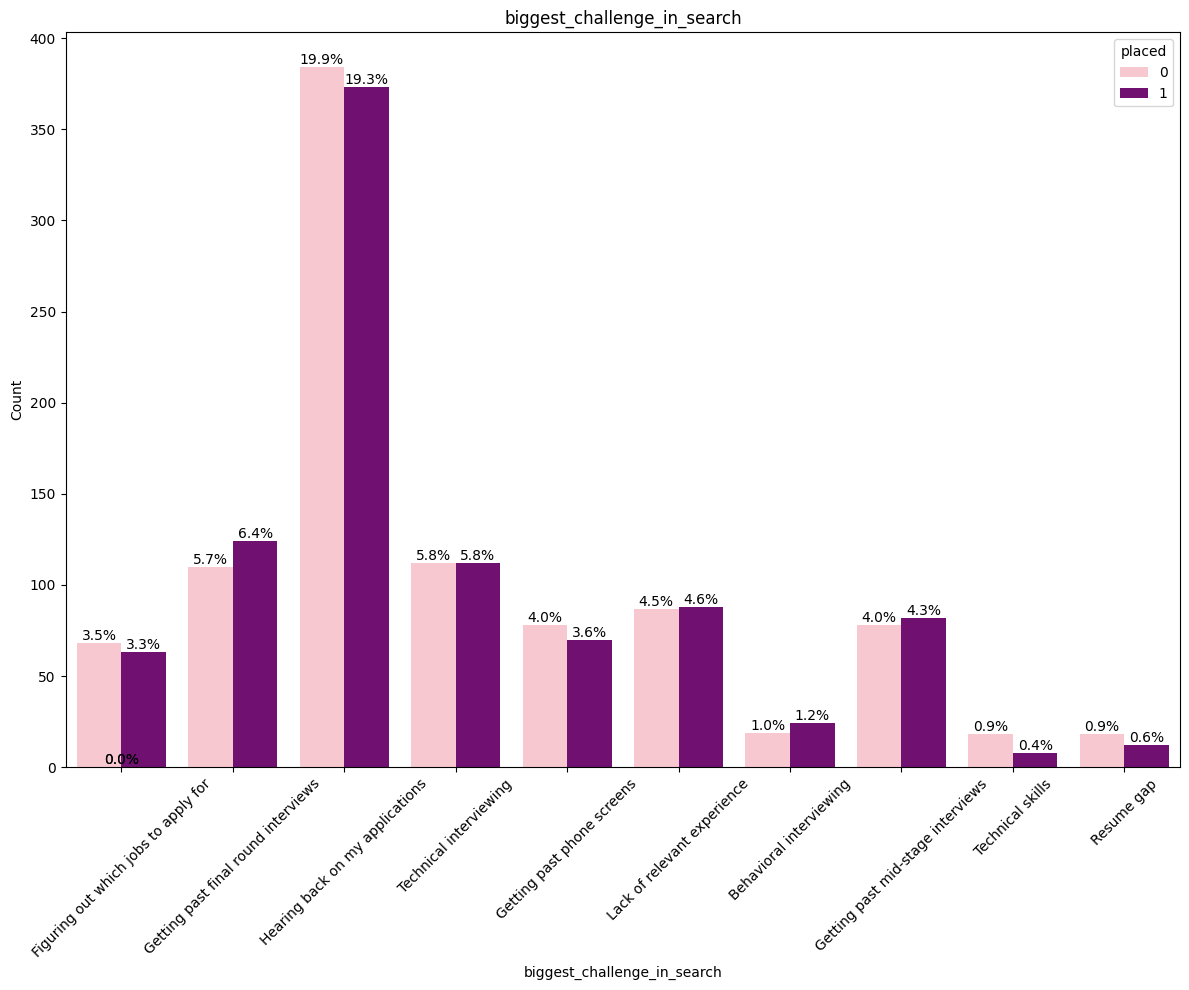

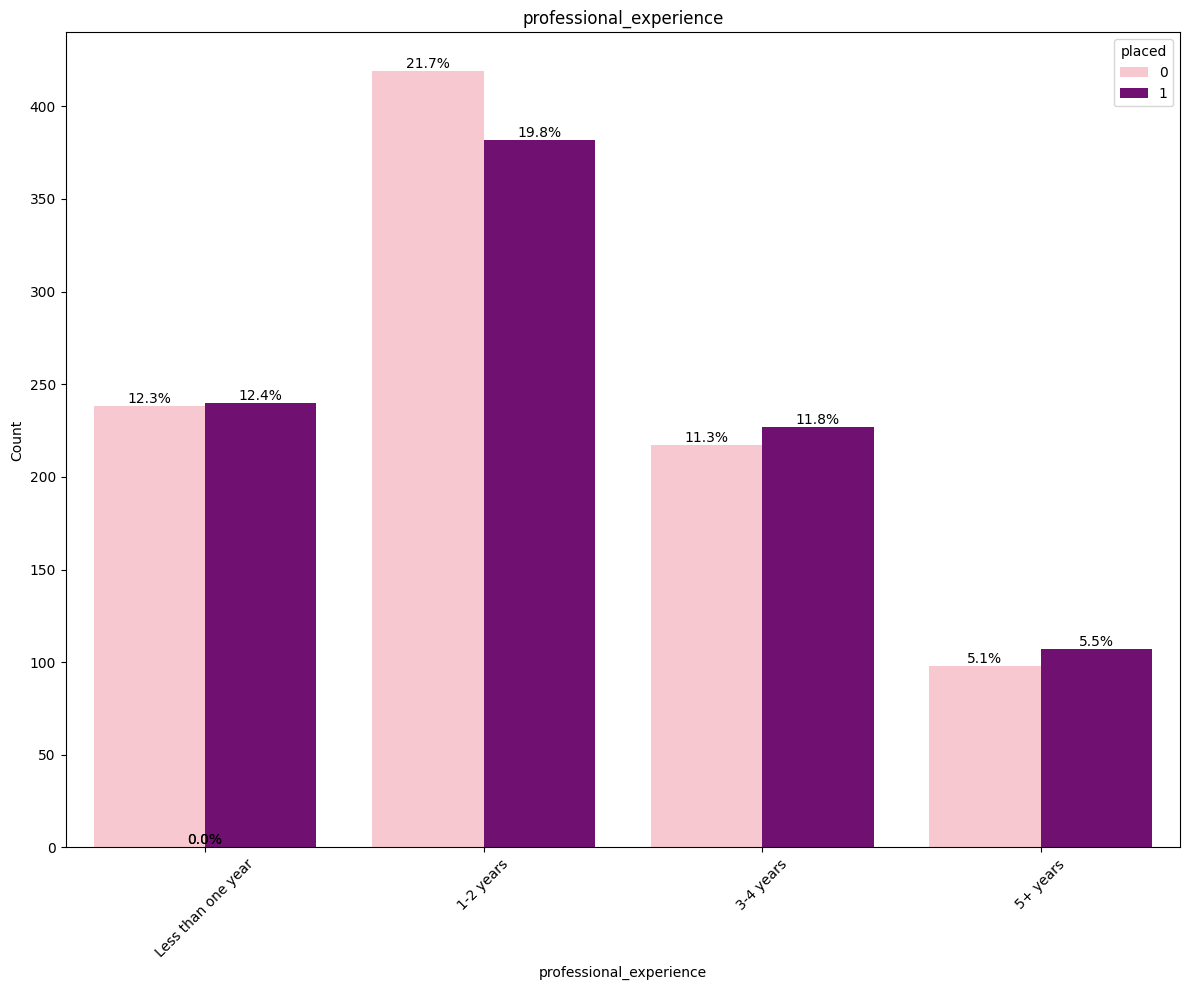

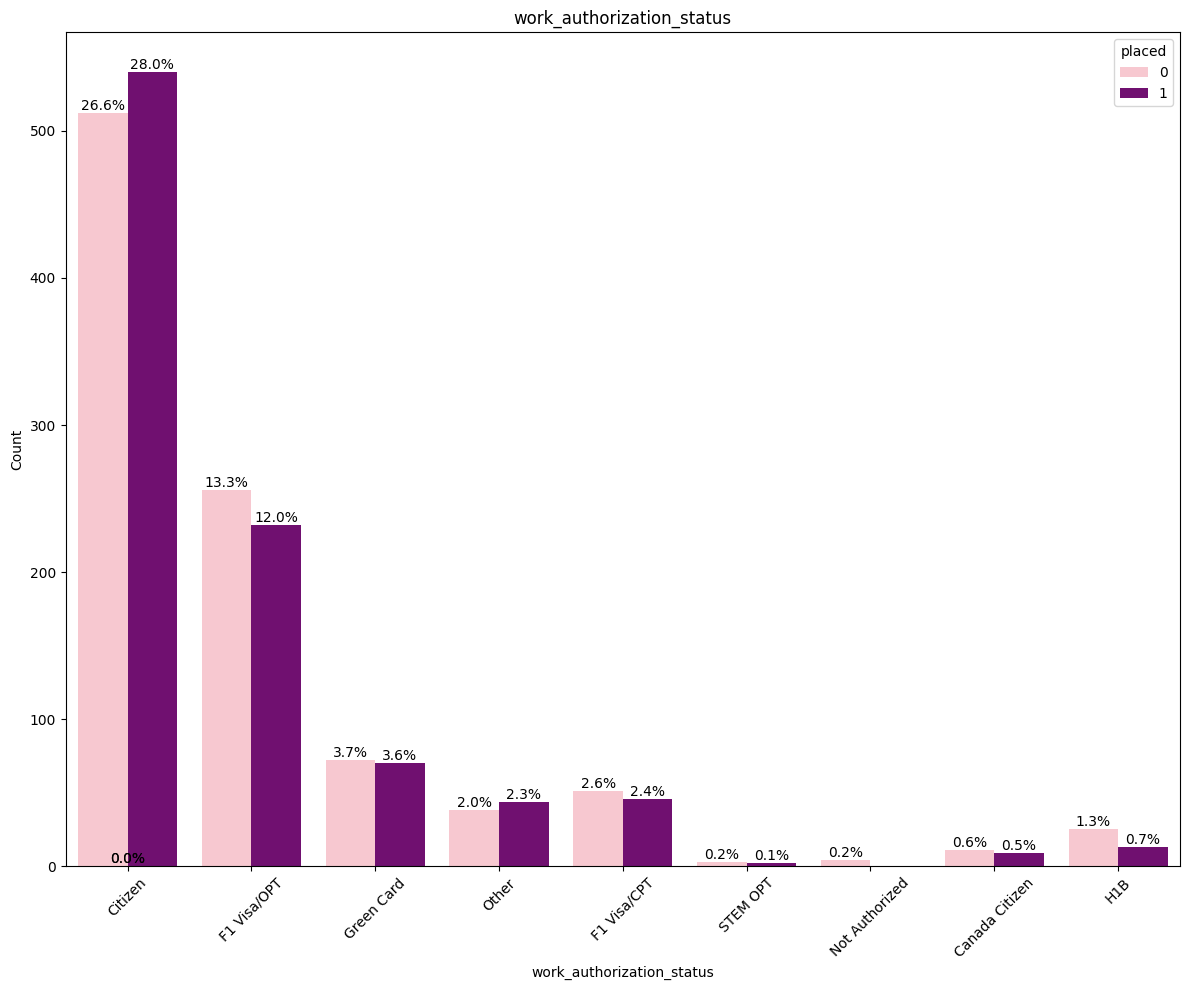

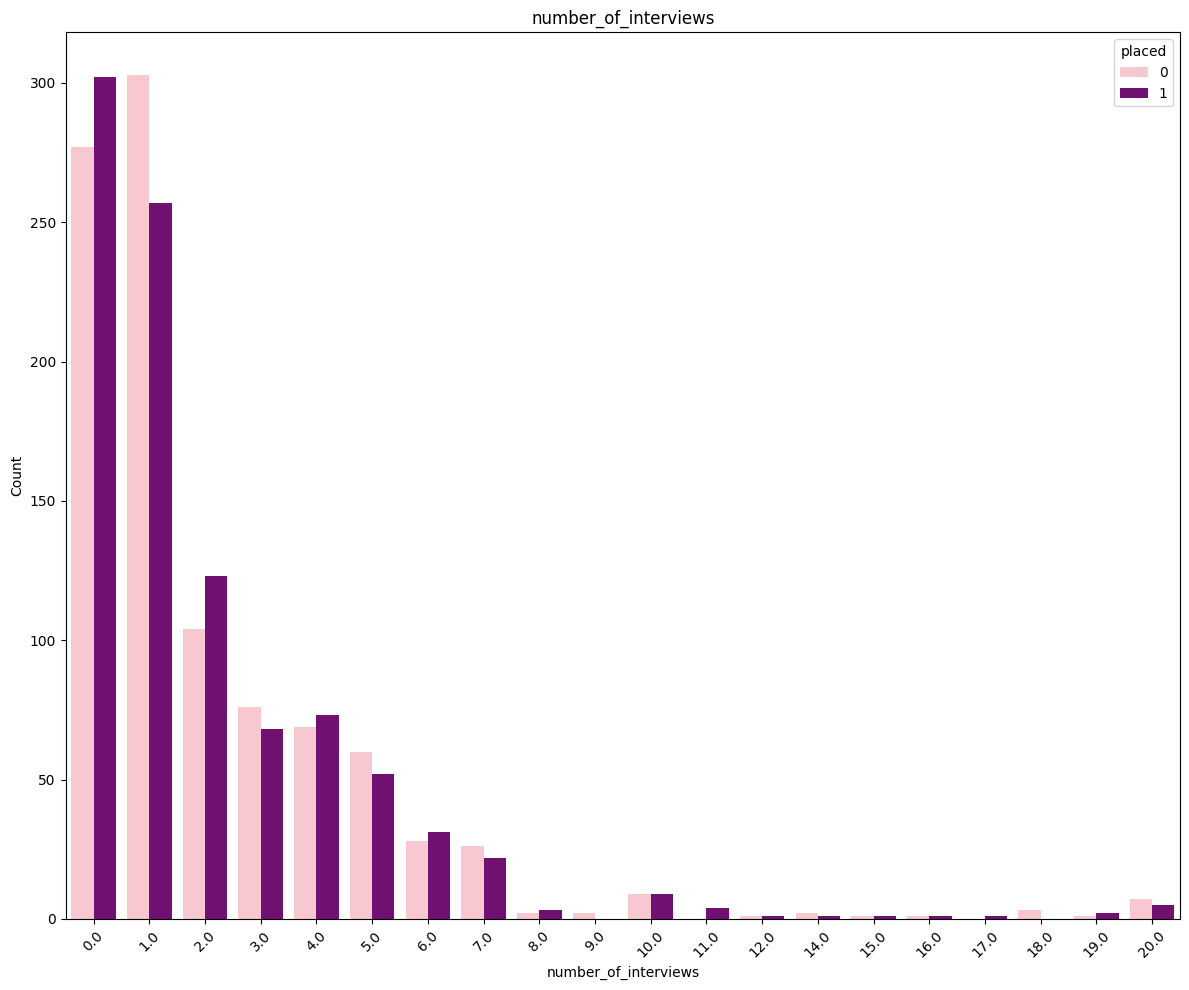

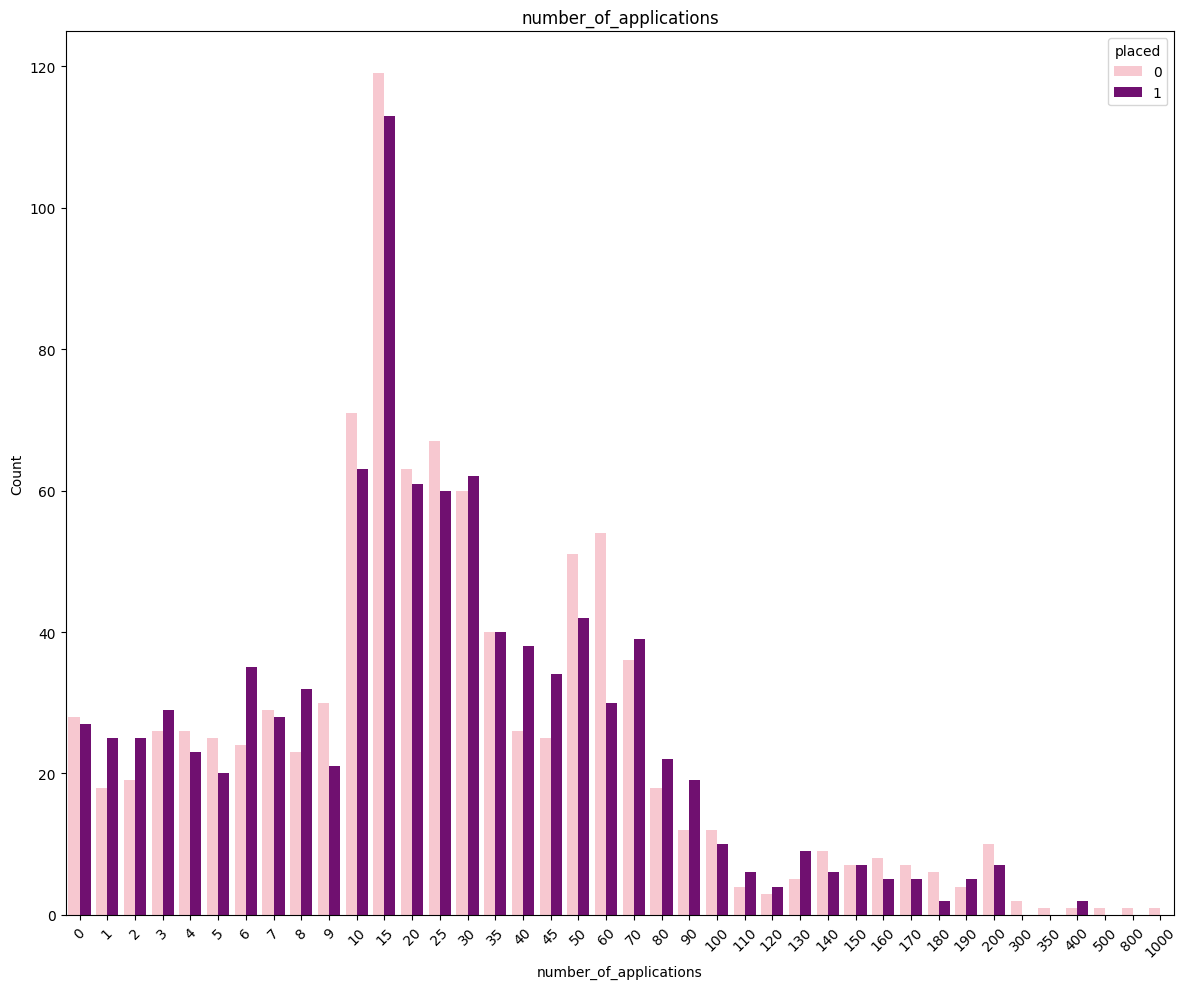

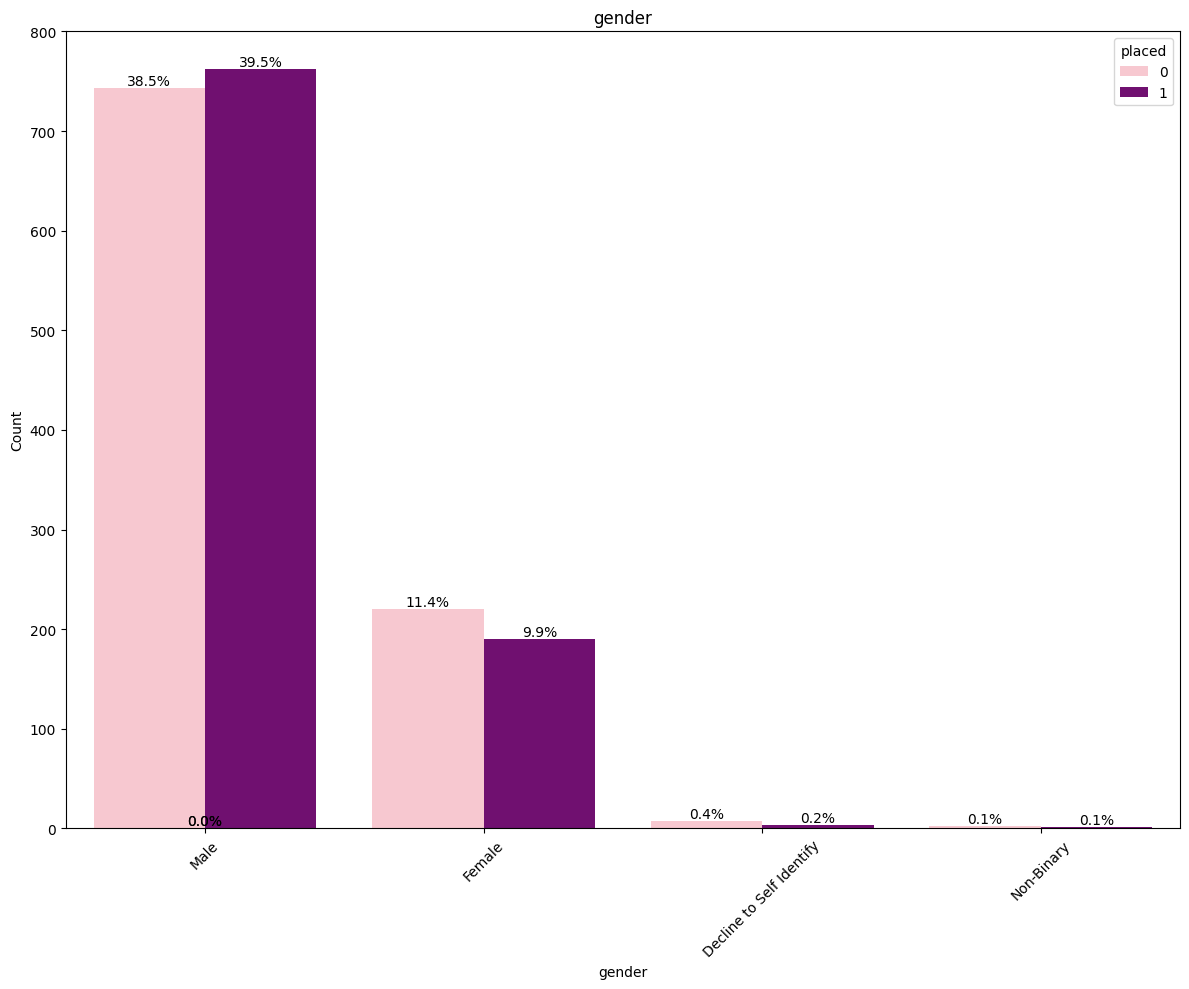

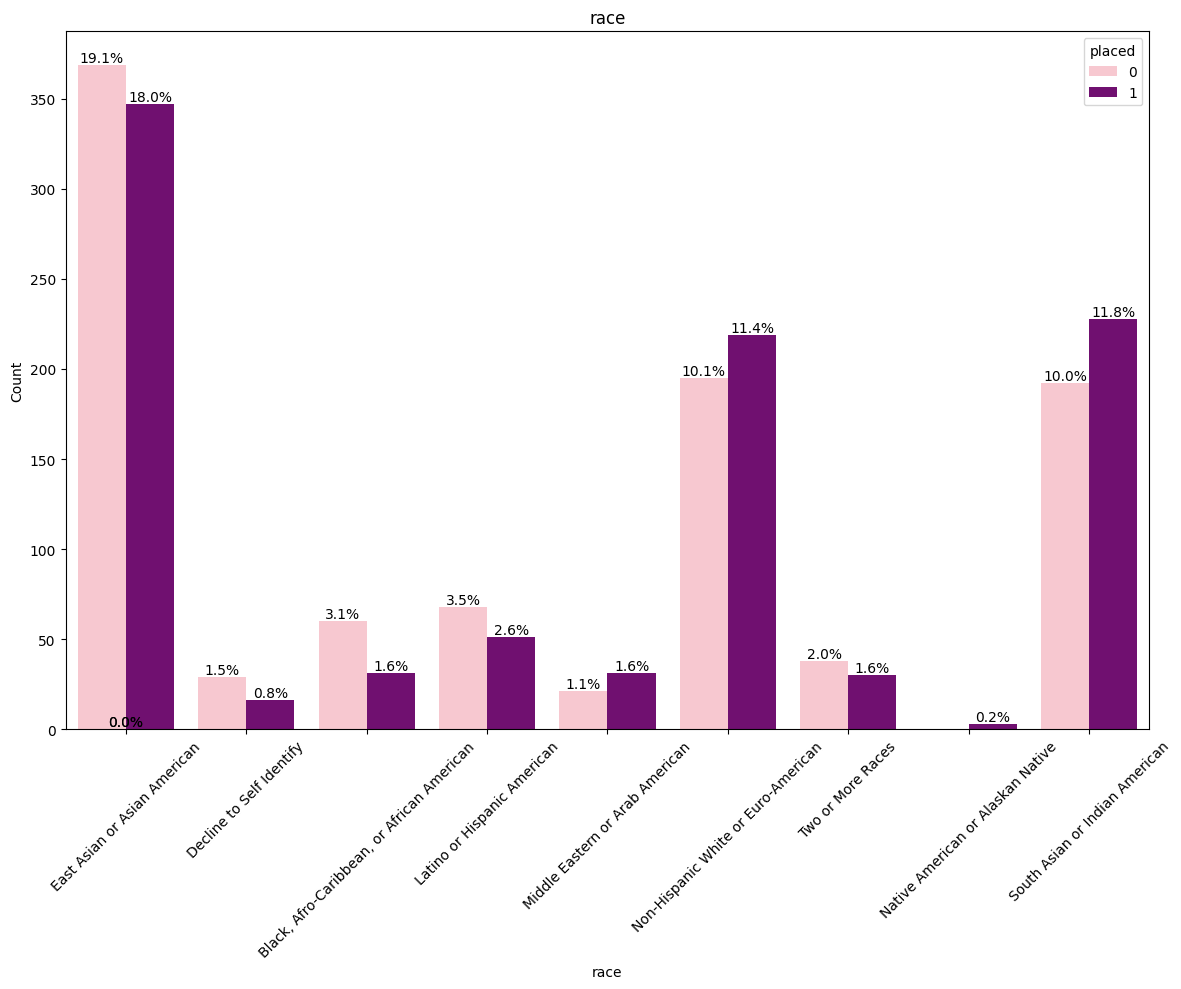

In [46]:
columns_with_percentages = ['pathrise_status', 'primary_track', 'placed', 'employment_status',
                            'highest_level_of_education', 'length_of_job_search',
                            'biggest_challenge_in_search', 'professional_experience',
                            'work_authorization_status', 'gender', 'race']

df1 = df.drop(columns=['program_duration_days'])
for column in df1.columns:
    plt.figure(figsize=(12, 10))

    #palet
    ax = sns.countplot(x=column, data=df, hue='placed', palette=['pink', 'purple'])

    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed

    if column in columns_with_percentages:
        total = len(df1[column])

        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


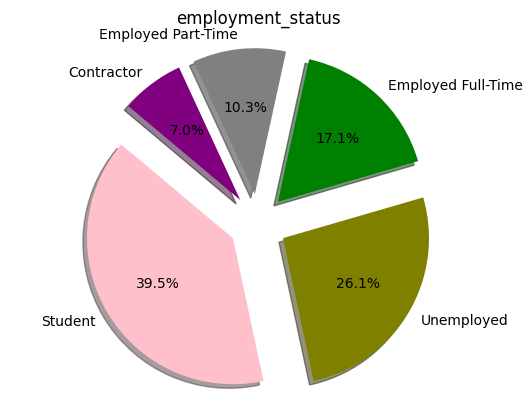

In [48]:
category_counts = df['employment_status '].value_counts()

sizes = (category_counts / category_counts.sum()) * 100

labels = category_counts.index

colors = ['pink', 'olive', 'green', 'gray', 'purple']
explode = [0.2] * len(labels)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('employment_status')

plt.axis('equal')
plt.show()


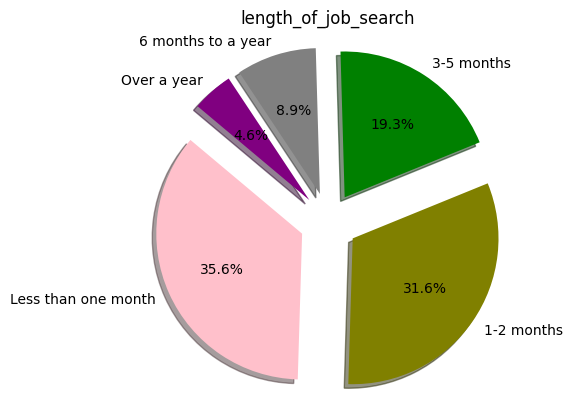

In [49]:
category_counts = df['length_of_job_search'].value_counts()

sizes = (category_counts / category_counts.sum()) * 100

labels = category_counts.index

colors = ['pink', 'olive', 'green', 'gray', 'purple']
explode = [0.2] * len(labels)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('length_of_job_search')

plt.axis('equal')
plt.show()

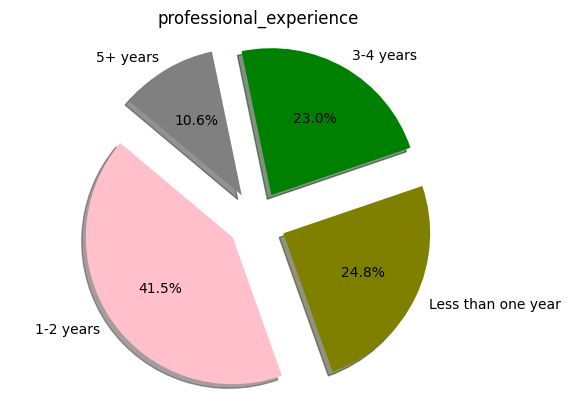

In [50]:
category_counts = df['professional_experience'].value_counts()

sizes = (category_counts / category_counts.sum()) * 100

labels = category_counts.index

colors = ['pink', 'olive', 'green', 'gray', 'purple']
explode = [0.2] * len(labels)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('professional_experience')
plt.axis('equal')
plt.show()

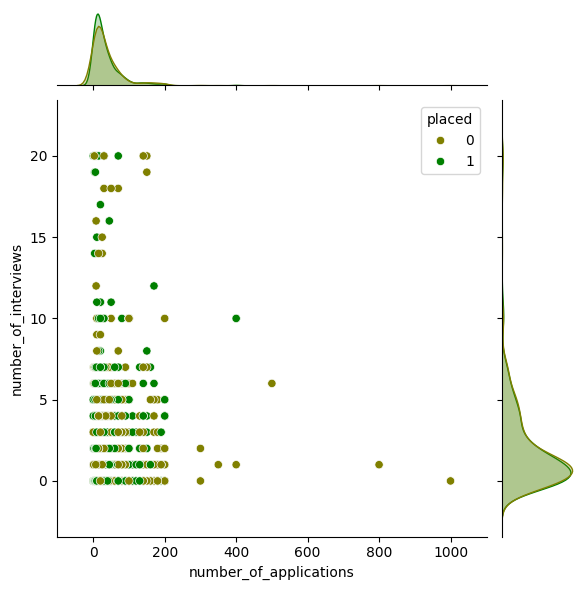

In [55]:
 palette_colors = { 0: 'olive', 1: 'green'}
sns.jointplot(x='number_of_applications', y='number_of_interviews', hue='placed', data=df, kind='scatter', palette=palette_colors)
plt.show()

# Feature Engineering

In [56]:
Processed_df = pd.get_dummies(df, columns=['pathrise_status', 'primary_track', 'cohort_tag',
       'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status','gender', 'race']).astype(int)

In [57]:
a = Processed_df.drop(columns=['program_duration_days'])

In [58]:
b = Processed_df['program_duration_days']

# Modeling

In [59]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.3, random_state=101)

# Linear Regressiom Model

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(a_train,b_train)

LinearRegression()

In [62]:
predict_lr = lr.predict(a_test)
predict_lr[:10]

array([160.74820814, 110.9269541 , -16.17479481, -31.29912351,
       186.19467422, 238.26072969, 162.96439414,  13.60694624,
       118.47544361, 167.55458869])

In [63]:
residual = (predict_lr - b_test)

<Axes: xlabel='program_duration_days'>

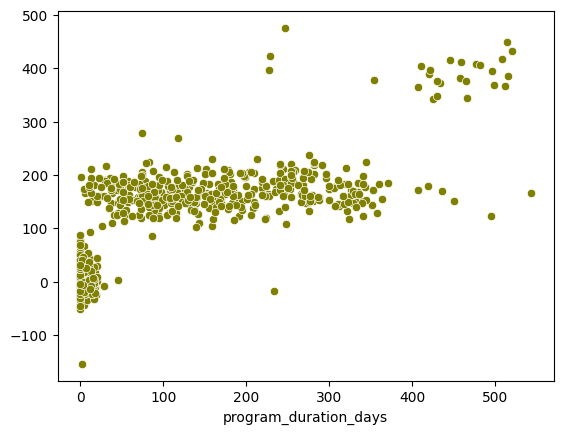

In [65]:
sns.scatterplot(x=b_test, y=predict_lr, color='olive')

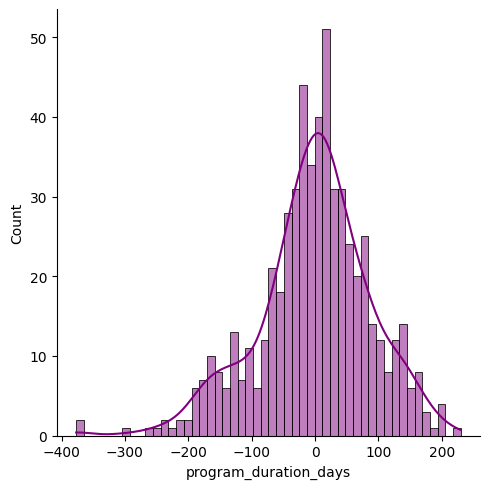

In [66]:
sns.displot(residual, bins=50, kde=True, color='purple')

In [67]:
print('MAE:', metrics.mean_absolute_error(b_test, predict_lr))

MAE: 66.68078676448958


In [68]:
pickle.dump(lr, open('Pro_Day_Estimator.pkl' , 'wb'))

# Logistic Regression Model

In [69]:
x = Processed_df.drop(columns=['placed'])

In [70]:
y = Processed_df['placed']

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [72]:
logreg = LogisticRegression()

In [73]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [74]:
predict_log = logreg.predict(x_test)

# Model Evaluation

In [75]:
confusion_matrix(predict_log,y_test)

array([[317,   0],
       [  0, 262]])

In [76]:
print(classification_report(y_test, predict_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       262

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579



In [77]:
accuracy_score(y_test, predict_log)

1.0

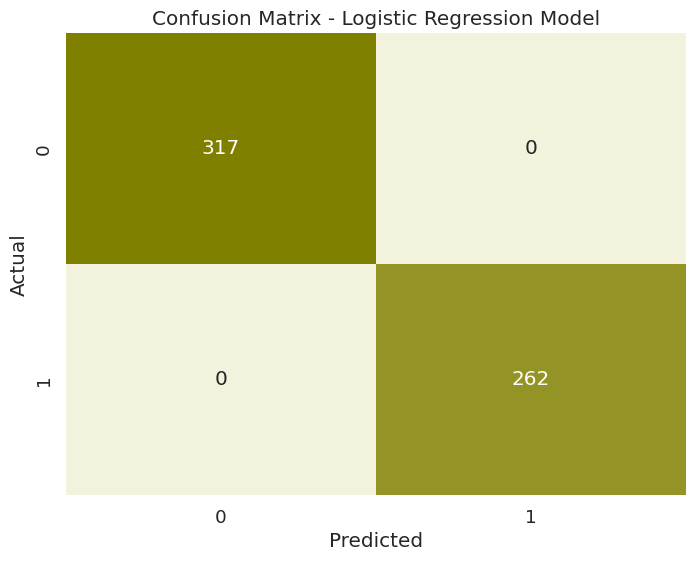

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = [[317, 0],
               [0, 262]]

labels = [0, 1]
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.light_palette("olive", as_cmap=True),
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()


# K Neighbors Nearest Model

In [88]:
knn = KNeighborsClassifier()

In [89]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [90]:
predict_knn = knn.predict(x_test)
predict_knn[:10]

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1])

# Model Evaluation

In [91]:
confusion_matrix(y_test, predict_knn)

array([[228,  89],
       [ 51, 211]])

In [92]:
accuracy_score(y_test,predict_knn)

0.7582037996545768

In [93]:
print(classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       317
           1       0.70      0.81      0.75       262

    accuracy                           0.76       579
   macro avg       0.76      0.76      0.76       579
weighted avg       0.77      0.76      0.76       579



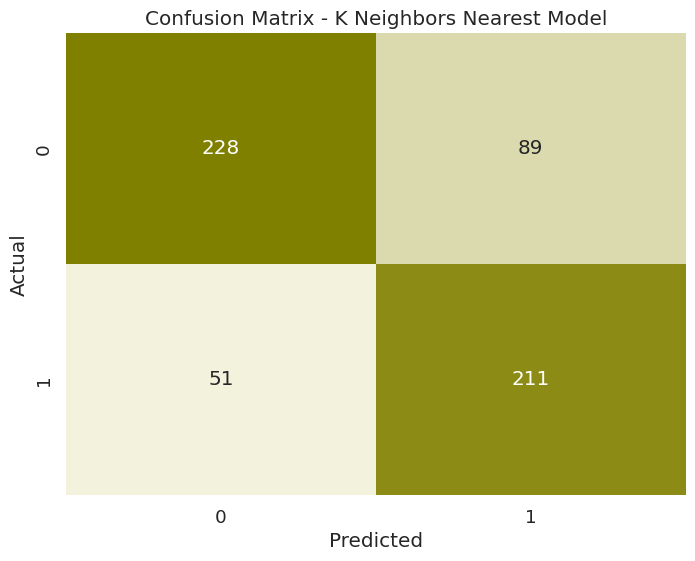

In [94]:
conf_matrix = [[228, 89],
               [51, 211]]

labels = [0, 1]
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.light_palette("olive", as_cmap=True),
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K Neighbors Nearest Model')
plt.show()


# Decision Tree Model

In [95]:
tree = DecisionTreeClassifier()

In [96]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [97]:
predict_tree = tree.predict(x_test)
predict_tree [:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

# Model Evaluation

In [98]:
confusion_matrix(y_test,predict_tree)

array([[317,   0],
       [  0, 262]])

In [99]:
accuracy_score(y_test,predict_tree)

1.0

In [100]:
print(classification_report(y_test,predict_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       262

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579



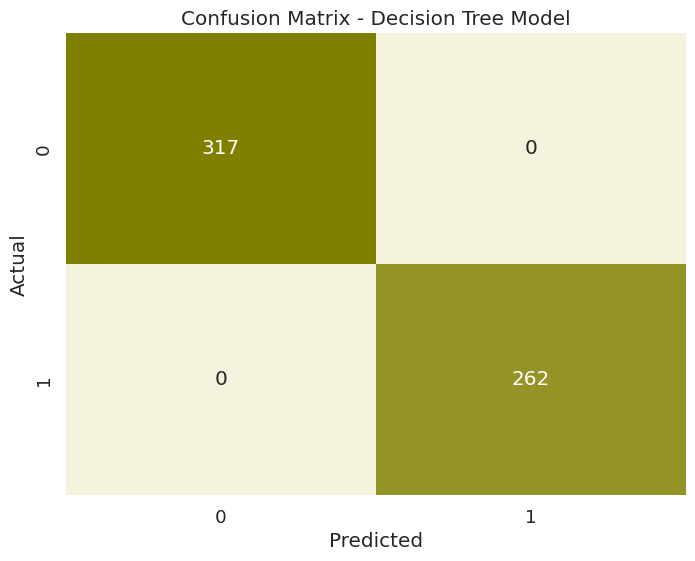

In [101]:
conf_matrix = [[317, 0],
               [0, 262]]

labels = [0, 1]
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.light_palette("olive", as_cmap=True),
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()


# Random Forest Model

In [102]:
forest = RandomForestClassifier(class_weight='balanced')

In [103]:
forest.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [104]:
predict_forest = forest.predict(x_test)
predict_forest[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

# Model Evaluation

In [106]:
confusion_matrix(y_test,predict_forest)

array([[317,   0],
       [  0, 262]])

In [107]:
accuracy_score(y_test,predict_forest)

1.0

In [108]:
print(classification_report(y_test,predict_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       262

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579



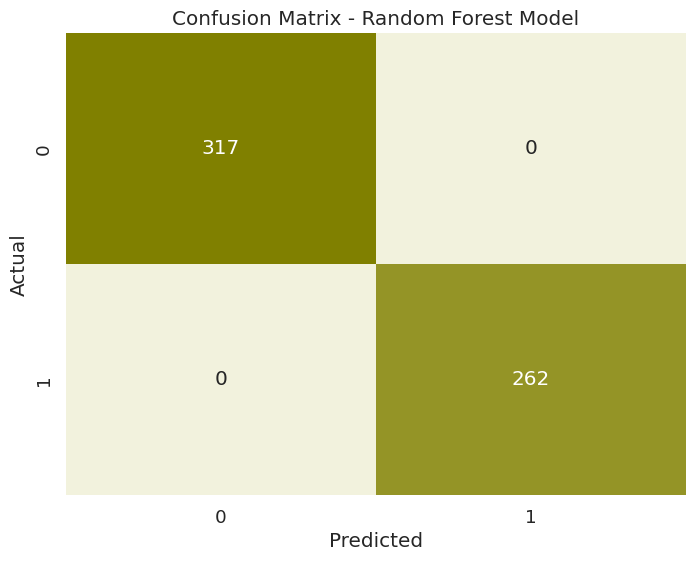

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = [[317, 0],
               [0, 262]]

labels = [0, 1]
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.light_palette("olive", as_cmap=True),
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()


In [111]:
pickle.dump(knn, open('placement_Estimator.pkl' , 'wb'))